### 3 Visualization - Prediction Confidence Heatmaps

A sliding window approach was applied on the whole slide images (WSIs) with the trained CNN model to generate confidence heatmaps. 

The WSIs were tiled into 1536 x 1536 images patches in the prepocessing steps. A sliding window approached was applied on evey image patch of a WSI. At each time, the CNN model took a 256x256 pixels region as input, forward propagated and generated a prediction score for cored plaque, diffuse plaque and CAA respectively. By systematically sliding the input region across the entire 1536 x 1536 image patch, the prediction scores were saved and ploted as prediction confidence heatmap for this patch. The heatmap for the WSI was obtained by doing this on all image patches of it.

In [1]:
import time, os, glob

import torch
torch.manual_seed(123456789)
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torchvision
from torchvision import transforms

import numpy as np
import matplotlib
matplotlib.use('PDF')   # for heatmap with original
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import Image
from tqdm import tqdm
import copy

In [2]:
IMG_DIR  = 'data/norm_tiles/'
MODEL_DIR = 'models/CNN_model_parameters.pkl'
SAVE_DIR = 'data/outputs/heatmaps/'

In [3]:
if not os.path.exists(SAVE_DIR):
        os.makedirs(SAVE_DIR)

In [5]:
# Remedy on NA4471-02_AB

# Save Normarlized Slides to Image Files by loading norm_tiles
SAVE_ORIG_DIR = 'data/outputs/norm_png/'
if not os.path.exists(SAVE_ORIG_DIR):
    os.makedirs(SAVE_ORIG_DIR)
        
filenames = glob.glob(IMG_DIR + '*')
filenames = [filename.split('/')[-1] for filename in filenames]
img_size = 1536

t = tqdm(total=len(filenames))
for i, filename in enumerate(filenames):
    if filename != "NA4471-02_AB":
        continue
    # Get image dimension
    TILE_DIR = IMG_DIR+'{}/0/'.format(filename)
    imgs = []
    for target in sorted(os.listdir(TILE_DIR)):
        d = os.path.join(TILE_DIR, target)
        if not os.path.isdir(d):
            continue
        for root, _, fnames in sorted(os.walk(d)):
            for fname in sorted(fnames):
                if fname.endswith('.jpg'):
                    path = os.path.join(root, fname)
                    imgs.append(path)
                    
    rows = [int(image.split('/')[-2]) for image in imgs]
    row_nums = max(rows) + 1
    cols = [int(image.split('/')[-1].split('.')[0]) for image in imgs]
    col_nums = max(cols) + 1
    width = col_nums*img_size
    height = row_nums*img_size
    
    t.set_description_str("Image " + str(i) + ': ({}, {}) ({}, {})'.format(col_nums, row_nums, width, height))
    t.refresh()
    t.write("", end=' ')
    
    # Generate WSI
    orig_img = Image.new('RGB', (width, height))
    for r in range(row_nums):
        for c in range(col_nums):
            img_path = TILE_DIR + '{}/{}.jpg'.format(r, c)
            img = Image.open(img_path)
            orig_img.paste(img, (c*img_size, r*img_size))

    orig_img.save(SAVE_ORIG_DIR+filename+'.png')
    
    t.update()
t.close()

Image 11: (47, 31) (72192, 47616):   0%|          | 0/18 [00:00<?, ?it/s]

Image 11: (47, 31) (72192, 47616):   6%|▌         | 1/18 [12:36<3:34:25, 756.82s/it]


In [3]:
# Save Normarlized Slides to Image Files by loading norm_tiles
SAVE_ORIG_DIR = 'data/outputs/norm_png/'
if not os.path.exists(SAVE_ORIG_DIR):
    os.makedirs(SAVE_ORIG_DIR)
        
filenames = glob.glob(IMG_DIR + '*')
filenames = [filename.split('/')[-1] for filename in filenames]
img_size = 1536

t = tqdm(total=len(filenames))
for i, filename in enumerate(filenames):
    # Get image dimension
    TILE_DIR = IMG_DIR+'{}/0/'.format(filename)
    imgs = []
    for target in sorted(os.listdir(TILE_DIR)):
        d = os.path.join(TILE_DIR, target)
        if not os.path.isdir(d):
            continue
        for root, _, fnames in sorted(os.walk(d)):
            for fname in sorted(fnames):
                if fname.endswith('.jpg'):
                    path = os.path.join(root, fname)
                    imgs.append(path)
                    
    rows = [int(image.split('/')[-2]) for image in imgs]
    row_nums = max(rows) + 1
    cols = [int(image.split('/')[-1].split('.')[0]) for image in imgs]
    col_nums = max(cols) + 1
    width = col_nums*img_size
    height = row_nums*img_size
    
    t.set_description_str("Image " + str(i) + ': ({}, {}) ({}, {})'.format(col_nums, row_nums, width, height))
    t.refresh()
    t.write("", end=' ')
    
    # Generate WSI
    orig_img = Image.new('RGB', (width, height))
    for r in range(row_nums):
        for c in range(col_nums):
            img_path = TILE_DIR + '{}/{}.jpg'.format(r, c)
            img = Image.open(img_path)
            orig_img.paste(img, (c*img_size, r*img_size))

    orig_img.save(SAVE_ORIG_DIR+filename+'.png')
    
    t.update()
t.close()

Image 0: (36, 31) (55296, 47616):   0%|          | 0/18 [00:00<?, ?it/s]

Image 1: (48, 31) (73728, 47616):   6%|▌         | 1/18 [08:04<2:17:17, 484.58s/it]

Image 2: (43, 30) (66048, 46080):  11%|█         | 2/18 [20:42<2:31:03, 566.48s/it]

Image 3: (45, 24) (69120, 36864):  17%|█▋        | 3/18 [30:49<2:24:37, 578.52s/it]

Image 4: (39, 28) (59904, 43008):  22%|██▏       | 4/18 [38:50<2:08:13, 549.54s/it]

Image 5: (37, 26) (56832, 39936):  28%|██▊       | 5/18 [46:53<1:54:41, 529.33s/it]

Image 6: (41, 31) (62976, 47616):  33%|███▎      | 6/18 [54:40<1:42:10, 510.86s/it]

Image 7: (38, 29) (58368, 44544):  39%|███▉      | 7/18 [1:06:09<1:43:25, 564.15s/it]

Image 8: (33, 31) (50688, 47616):  44%|████▍     | 8/18 [1:15:32<1:33:59, 563.93s/it]

Image 9: (38, 31) (58368, 47616):  50%|█████     | 9/18 [1:23:37<1:21:01, 540.15s/it]

Image 10: (36, 30) (55296, 46080):  56%|█████▌    | 10/18 [1:32:01<1:10:34, 529.31s/it]

Image 11: (45, 24) (69120, 36864):  61%|██████    | 11/18 [1:40:36<1:01:16, 525.16s/it]

Image 12: (45, 31) (69120, 47616):  67%|██████▋   | 12/18 [1:49:34<52:54, 529.01s/it]  

Image 13: (32, 28) (49152, 43008):  72%|███████▏  | 13/18 [1:59:12<45:17, 543.54s/it]

Image 14: (33, 24) (50688, 36864):  78%|███████▊  | 14/18 [2:06:07<33:39, 504.97s/it]

Image 15: (36, 30) (55296, 46080):  83%|████████▎ | 15/18 [2:12:04<23:01, 460.48s/it]

Image 16: (36, 27) (55296, 41472):  89%|████████▉ | 16/18 [2:19:59<15:29, 464.87s/it]

Image 17: (37, 28) (56832, 43008):  94%|█████████▍| 17/18 [2:26:56<07:30, 450.68s/it]

Image 17: (37, 28) (56832, 43008): 100%|██████████| 18/18 [2:34:22<00:00, 449.17s/it]


In [8]:
img_size = 1536
stride = 16
batch_size = 64
num_workers = 16

norm = np.load('utils/normalization.npy', allow_pickle=True).item()
normalize = transforms.Normalize(norm['mean'], norm['std'])
to_tensor = transforms.ToTensor()
use_gpu = torch.cuda.is_available()

filenames = glob.glob(IMG_DIR + '*')
filenames = [filename.split('/')[-1] for filename in filenames]
print(filenames)

['NA3777-02_AB', 'NA4077-02_AB', 'NA4092-02_AB', 'NA4107-02_AB', 'NA4160-02_AB', 'NA4195-02_AB', 'NA4256-02_AB', 'NA4299-02_AB', 'NA4391-02_AB', 'NA4450-02_AB', 'NA4463-02_AB', 'NA4471-02_AB', 'NA4553-02_AB', 'NA4626-02_AB', 'NA4672-02_AB', 'NA4675-02_AB', 'NA4691-02_AB', 'NA4695-02_AB']


In [6]:
from torch.utils.data import Dataset

class HeatmapDataset(Dataset):
    def __init__(self, tile_dir, row, col, stride=1):
        """
        Args:
            tile_dir (string): path to the folder where tiles are
            row (int): row index of the tile being operated
            col (int): column index of the tile being operated
            stride: stride of sliding 
        """
        self.tile_size = 256
        self.img_size = 1536
        self.stride = stride
        padding = 128
        large_img = torch.ones(3, 3*self.img_size, 3*self.img_size)
        
        for i in [-1,0,1]:
            for j in [-1,0,1]:
                img_path = tile_dir+'/'+str(row+i)+'/'+str(col+j)+'.jpg'
                try:
                    img = Image.open(img_path)
                    img = transforms.ToTensor()(img) 
                except:
                    img = torch.ones(3,self.img_size, self.img_size)
                
                large_img[:, (i+1)*self.img_size:(i+2)*self.img_size,(j+1)*self.img_size:(j+2)*self.img_size] = img
        
        large_img = normalize(large_img)
        
        self.padding_img = large_img[:,self.img_size-padding:2*self.img_size+padding, self.img_size-padding:2*self.img_size+padding]
        self.len = (self.img_size//self.stride)**2
        
    def __getitem__(self, index):

        row = (index*self.stride // self.img_size)*self.stride
        col = (index*self.stride % self.img_size)

        img = self.padding_img[:, row:row+self.tile_size, col:col+self.tile_size]        
    
        return img

    def __len__(self):
        return self.len

In [7]:
class Net(nn.Module):

    def __init__(self, fc_nodes=512, num_classes=3, dropout=0.5):
        super(Net, self).__init__()
        
    def forward(self, x):
 
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)

        return x


In [8]:
# instatiate the model
model = torch.load(MODEL_DIR, map_location=lambda storage, loc: storage)

if use_gpu:
    model = model.module.cuda()
else:
    model = model.module

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:325: SourceChangeWarning: source code of class 'torch.nn.parallel.data_parallel.DataParallel' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:325: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:325: SourceChangeWarning: source code of class 'torch.nn.modules.pooling.MaxPool2d' has changed. you can retrieve the original source code by accessing the object's source attribut

In [9]:
for filename in filenames:
    TILE_DIR = IMG_DIR+'{}/0/'.format(filename)

    imgs = []
    for target in sorted(os.listdir(TILE_DIR)):
        d = os.path.join(TILE_DIR, target)
        if not os.path.isdir(d):
            continue

        for root, _, fnames in sorted(os.walk(d)):
            for fname in sorted(fnames):
                if fname.endswith('.jpg'):
                    path = os.path.join(root, fname)
                    imgs.append(path)

    rows = [int(image.split('/')[-2]) for image in imgs]
    row_nums = max(rows) + 1
    cols = [int(image.split('/')[-1].split('.')[0]) for image in imgs]
    col_nums = max(cols) +1    
    
    heatmap_res = img_size // stride
    final_output = np.zeros((3, heatmap_res*row_nums, heatmap_res*col_nums))

    model.train(False)  # Set model to evaluate mode

    for row in tqdm(range(row_nums)):
        for col in range(col_nums):

            image_datasets = HeatmapDataset(TILE_DIR, row, col, stride=stride)
            dataloader = torch.utils.data.DataLoader(image_datasets, batch_size=batch_size,
                                                 shuffle=False, num_workers=num_workers)

            running_preds = torch.Tensor(0)
            for data in dataloader:
                # get the inputs
                inputs = data
                # wrap them in Variable
                if use_gpu:
                    inputs = Variable(inputs.cuda(), volatile=True)
                    # forward
                    outputs = model(inputs)
                    preds = F.sigmoid(outputs) #posibility for each class
                    preds = preds.data.cpu()
                    running_preds = torch.cat([running_preds, preds])

            cored = np.asarray(running_preds[:,0]).reshape(img_size//stride,img_size//stride)
            diffuse = np.asarray(running_preds[:,1]).reshape(img_size//stride,img_size//stride)
            caa = np.asarray(running_preds[:,2]).reshape(img_size//stride,img_size//stride)

            final_output[0, row*heatmap_res:(row+1)*heatmap_res, col*heatmap_res:(col+1)*heatmap_res] = cored
            final_output[1, row*heatmap_res:(row+1)*heatmap_res, col*heatmap_res:(col+1)*heatmap_res] = diffuse
            final_output[2, row*heatmap_res:(row+1)*heatmap_res, col*heatmap_res:(col+1)*heatmap_res] = caa

    np.save(SAVE_DIR+filename, final_output)

100%|██████████| 28/28 [3:20:25<00:00, 428.30s/it]  


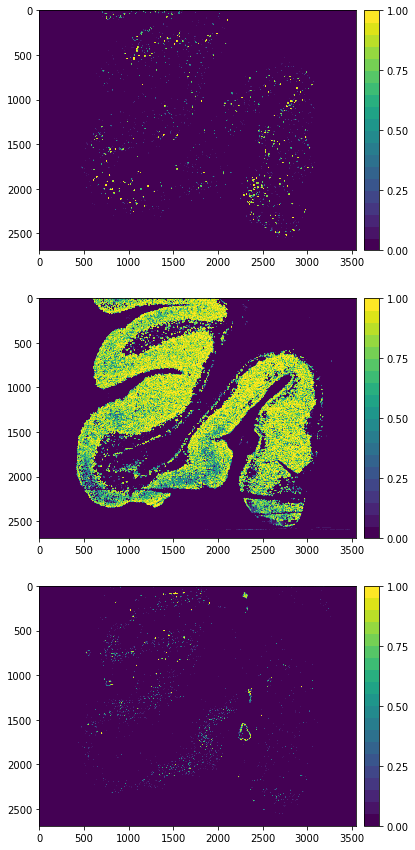

In [10]:
fig = plt.figure(figsize=(45,15))
    
ax = fig.add_subplot(311)

im = ax.imshow(final_output[0], cmap=plt.cm.get_cmap('viridis', 20), vmin=0, vmax=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, ticks=[0.0, 0.25, 0.5, 0.75, 1.0])

ax = fig.add_subplot(312)

im = ax.imshow(final_output[1], cmap=plt.cm.get_cmap('viridis', 20), vmin=0, vmax=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, ticks=[0.0, 0.25, 0.5, 0.75, 1.0])

ax = fig.add_subplot(313)

im = ax.imshow(final_output[2], cmap=plt.cm.get_cmap('viridis', 20), vmin=0, vmax=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, ticks=[0.0, 0.25, 0.5, 0.75, 1.0])

In [3]:
# Save Heatmaps to Image Files
SAVE_PNG_DIR = 'data/outputs/heatmaps_png/'
if not os.path.exists(SAVE_PNG_DIR):
        os.makedirs(SAVE_PNG_DIR)

filenames = glob.glob(SAVE_DIR + '*')
filenames = [filename.split('/')[-1] for filename in filenames]

t = tqdm(total=len(filenames))
for i, filename in enumerate(filenames):
    # heatmaps[0] = cored, heatmaps[1] = diffuse, heatmaps[2] = caa
    heatmaps = np.load(SAVE_DIR+filename)
    t.set_description_str("Image " + str(i) + " shape: " + str(heatmaps.shape))
    t.refresh()
    t.write("", end=' ')
    
    fig = plt.figure(figsize=(45,15), dpi=1200)

    ax = fig.add_subplot(311, title="Cored")
    im = plt.imshow(heatmaps[0], cmap=plt.cm.get_cmap('viridis', 20), vmin=0, vmax=1)
    divider = make_axes_locatable(ax)
    ax.set_axis_off()
    cax = divider.append_axes("right", size="5%", pad=0.1)
    plt.colorbar(im, cax=cax, ticks=[0.0, 0.25, 0.5, 0.75, 1.0])

    ax = fig.add_subplot(312, title="Diffuse")
    im = plt.imshow(heatmaps[1], cmap=plt.cm.get_cmap('viridis', 20), vmin=0, vmax=1)
    divider = make_axes_locatable(ax)
    ax.set_axis_off()
    cax = divider.append_axes("right", size="5%", pad=0.1)
    plt.colorbar(im, cax=cax, ticks=[0.0, 0.25, 0.5, 0.75, 1.0])

    ax = fig.add_subplot(313, title="CAA")
    im = plt.imshow(heatmaps[2], cmap=plt.cm.get_cmap('viridis', 20), vmin=0, vmax=1)
    divider = make_axes_locatable(ax)
    ax.set_axis_off()
    cax = divider.append_axes("right", size="5%", pad=0.1)
    plt.colorbar(im, cax=cax, ticks=[0.0, 0.25, 0.5, 0.75, 1.0])

    fig.savefig(SAVE_PNG_DIR+filename.split('.')[0]+'.png', dpi=fig.dpi, bbox_inches='tight')
    plt.close(fig)
    t.update()
t.close()

Image 0 shape: (3, 2976, 3456):   0%|          | 0/18 [00:00<?, ?it/s]

Image 1 shape: (3, 2976, 4608):   6%|▌         | 1/18 [01:49<30:55, 109.14s/it]

Image 2 shape: (3, 2880, 4128):  11%|█         | 2/18 [03:45<29:30, 110.66s/it]

Image 3 shape: (3, 2304, 4320):  17%|█▋        | 3/18 [05:37<27:49, 111.33s/it]

Image 4 shape: (3, 2688, 3744):  22%|██▏       | 4/18 [07:29<25:57, 111.26s/it]

Image 5 shape: (3, 2496, 3552):  28%|██▊       | 5/18 [09:19<24:03, 111.02s/it]

Image 6 shape: (3, 2976, 3936):  33%|███▎      | 6/18 [11:09<22:08, 110.71s/it]

Image 7 shape: (3, 2784, 3648):  39%|███▉      | 7/18 [12:56<20:06, 109.64s/it]

Image 8 shape: (3, 2976, 3168):  44%|████▍     | 8/18 [14:42<18:05, 108.53s/it]

Image 9 shape: (3, 2976, 3648):  50%|█████     | 9/18 [16:26<16:02, 106.99s/it]

Image 10 shape: (3, 2880, 3456):  56%|█████▌    | 10/18 [18:11<14:11, 106.41s/it]

Image 11 shape: (3, 2304, 4320):  61%|██████    | 11/18 [19:54<12:18, 105.54s/it]

Image 12 shape: (3, 2976, 4320):  67%|██████▋   | 12/18 [21:45<10:42, 107.12s/it]

Image 13 shape: (3, 2688, 3072):  72%|███████▏  | 13/18 [23:33<08:58, 107.61s/it]

Image 14 shape: (3, 2304, 3168):  78%|███████▊  | 14/18 [25:17<07:06, 106.58s/it]

Image 15 shape: (3, 2880, 3456):  83%|████████▎ | 15/18 [27:07<05:22, 107.48s/it]

Image 16 shape: (3, 2592, 3456):  89%|████████▉ | 16/18 [28:56<03:35, 107.88s/it]

Image 17 shape: (3, 2688, 3552):  94%|█████████▍| 17/18 [30:45<01:48, 108.53s/it]

Image 17 shape: (3, 2688, 3552): 100%|██████████| 18/18 [32:32<00:00, 108.35s/it]


In [3]:
# Save Heatmaps with originals to Image Files
import pyvips as Vips

# map vips formats to np dtypes
format_to_dtype = {
    'uchar': np.uint8,
    'char': np.int8,
    'ushort': np.uint16,
    'short': np.int16,
    'uint': np.uint32,
    'int': np.int32,
    'float': np.float32,
    'double': np.float64,
    'complex': np.complex64,
    'dpcomplex': np.complex128,
}

# vips image to numpy array
def vips2numpy(vi):
    return np.ndarray(buffer=vi.write_to_memory(),
                      dtype=format_to_dtype[vi.format],
                      shape=[vi.height, vi.width, vi.bands])

ORIG_DIR = 'data/box/'
SAVE_PNG_DIR = 'data/outputs/heatmaps_original_png/'
if not os.path.exists(SAVE_PNG_DIR):
        os.makedirs(SAVE_PNG_DIR)

filenames = glob.glob(IMG_DIR + '*')
filenames = [filename.split('/')[-1] for filename in filenames]

t = tqdm(total=len(filenames))
for i, filename in enumerate(filenames):
    if i <= 15:
        t.update()
        continue
    # heatmaps[0] = cored, heatmaps[1] = diffuse, heatmaps[2] = caa
    heatmaps = np.load(SAVE_DIR+filename+'.npy')
    
    # Load original slide image
    vips_img = Vips.Image.new_from_file(ORIG_DIR+filename+'.svs', level=0)
    vips_img = vips_img.resize(0.4)   # Resize by 2x
    orig_img = vips2numpy(vips_img)
    
    t.set_description_str("Image " + str(i) + " shape: " + str(orig_img.shape) + " heatmap: " + str(heatmaps.shape))
    t.refresh()
    t.write("", end=' ')
    
    # For scale: 60, 15, 1200
    fig = plt.figure(figsize=(90,22.5), dpi=4800)

    ax = fig.add_subplot(411, title=filename)
    plt.imshow(orig_img)
    ax.set_axis_off()
    
    ax = fig.add_subplot(412, title="Cored")
    im = plt.imshow(heatmaps[0], cmap=plt.cm.get_cmap('viridis', 20), vmin=0, vmax=1)
    divider = make_axes_locatable(ax)
    ax.set_axis_off()
    cax = divider.append_axes("right", size="5%", pad=0.1)
    plt.colorbar(im, cax=cax, ticks=[0.0, 0.25, 0.5, 0.75, 1.0])

    ax = fig.add_subplot(413, title="Diffuse")
    im = plt.imshow(heatmaps[1], cmap=plt.cm.get_cmap('viridis', 20), vmin=0, vmax=1)
    divider = make_axes_locatable(ax)
    ax.set_axis_off()
    cax = divider.append_axes("right", size="5%", pad=0.1)
    plt.colorbar(im, cax=cax, ticks=[0.0, 0.25, 0.5, 0.75, 1.0])

    ax = fig.add_subplot(414, title="CAA")
    im = plt.imshow(heatmaps[2], cmap=plt.cm.get_cmap('viridis', 20), vmin=0, vmax=1)
    divider = make_axes_locatable(ax)
    ax.set_axis_off()
    cax = divider.append_axes("right", size="5%", pad=0.1)
    plt.colorbar(im, cax=cax, ticks=[0.0, 0.25, 0.5, 0.75, 1.0])

    fig.savefig(SAVE_PNG_DIR+filename+'.pdf', dpi=fig.dpi, bbox_inches='tight')
    
    plt.close(fig)
    t.update()
t.close()

# Command to convert pdf to png
# pdftoppm NA3777-02_AB.pdf NA3777-02_AB -png -r 2600

Image 16 shape: (16429, 21514, 4) heatmap: (3, 2592, 3456):  89%|████████▉ | 16/18 [00:51<00:06,  3.23s/it]

Image 17 shape: (16654, 22310, 4) heatmap: (3, 2688, 3552):  94%|█████████▍| 17/18 [11:24<00:35, 35.05s/it]

Image 17 shape: (16654, 22310, 4) heatmap: (3, 2688, 3552): 100%|██████████| 18/18 [20:35<00:00, 216.39s/it]


In [87]:
# Obtain CNN results and calculate a rough density
import xml.etree.ElementTree as ET
import csv
import pandas as pd

SAVE_CSV_DIR = 'data/outputs/heatmaps_csv/'
if not os.path.exists(SAVE_CSV_DIR):
    os.makedirs(SAVE_CSV_DIR)
SAVE_CSV_FILE = SAVE_CSV_DIR + 'Plaque Density.csv'

# Threshold for CNN prediction probability
threshold = 0.9

filenames = glob.glob(IMG_DIR + '*')
filenames = [filename.split('/')[-1] for filename in filenames]

# Initialize csv file
data_fields = [['imagename',
                'width',
                'height',
                'area',
                'threshold',
                '# of cored',
                '# of diffuse',
                '# of caa'
                'density of cored',
                'density of diffuse',
                'density of caa']]

with open(SAVE_CSV_FILE, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data_fields)

t = tqdm(total=len(filenames))
for i, filename in enumerate(filenames):
    # Get WSI dimension
    XML_DIR = IMG_DIR+'{}/{}/vips-properties.xml'.format(filename, filename)
    tree = ET.parse(XML_DIR)
    root = tree.getroot()
    width = int(root[0][0][1].text)
    height = int(root[0][1][1].text)
    area = width * height
    
    # Get CNN results
    heatmaps = np.load(SAVE_DIR+filename+'.npy')
    cored = heatmaps[0]
    diffuse = heatmaps[1]
    caa = heatmaps[2]
    
    cored_count = cored[np.where(cored > threshold)].size
    diffuse_count = diffuse[np.where(diffuse > threshold)].size
    caa_count = caa[np.where(caa > threshold)].size
    
    # Calculate density
    d_cored = cored_count / area * 1e6
    d_diffuse = diffuse_count / area * 1e6
    d_caa = caa_count / area * 1e6

    data = [[filename, width, height, area, threshold, cored_count, diffuse_count, caa_count, d_cored, d_diffuse, d_caa]]
    
    with open(SAVE_CSV_FILE, 'a') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(data)
    t.update()
t.close()

# Print out csv
csv_reader = pd.read_csv(SAVE_CSV_FILE)
csv_reader.sort_values('density of diffuse', ascending = False)

100%|██████████| 18/18 [00:03<00:00,  6.16it/s]


,imagename,width,height,area,threshold,# of cored,# of diffuse,# of caa,density of cored,density of diffuse,density of caa
0,NA3777-02_AB,53784,47177,2537367768,0.9,6502,2042399,1897,2.562498,804.928251,0.747625
4,NA4160-02_AB,59760,41787,2497191120,0.9,31019,1478413,3557,12.421556,592.030377,1.424400
17,NA4695-02_AB,55776,41634,2322177984,0.9,25421,1002352,6624,10.947051,431.643055,2.852495
9,NA4450-02_AB,57768,47481,2742882408,0.9,31120,1136806,552,11.345729,414.456703,0.201248
6,NA4256-02_AB,61752,46410,2865910320,0.9,32176,1113128,143560,11.227148,388.402942,50.092286
7,NA4299-02_AB,57768,43740,2526772320,0.9,70000,940190,974,27.703327,372.091301,0.385472
3,NA4107-02_AB,67728,36459,2469295152,0.9,31850,902238,462,12.898418,365.382809,0.187098
8,NA4391-02_AB,49800,47520,2366496000,0.9,24189,792054,6627,10.221441,334.694840,2.800343
16,NA4691-02_AB,53784,41073,2209070232,0.9,13423,529613,5462,6.076312,239.744754,2.472533
15,NA4675-02_AB,53784,45548,2449753632,0.9,100957,537865,3730,41.211083,219.558813,1.522602
